### 기본적인 SVM 적합

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
# from sklearn import svm, datasets

iris = sklearn.datasets.load_iris()

iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

X = iris.data[:, :2]
y = iris.target

print(X.shape)
print(y.shape)

iris_df

(150, 2)
(150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
C = 1 # SVM이 regularization parameter
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X, y)

SVC(C=1, kernel='linear')

In [8]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]], dtype=int64)

### LinearSVM 활용

In [9]:
clf = svm.LinearSVC(C=C, max_iter=10000)
clf.fit(X, y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]], dtype=int64)

In [10]:
# rbf 활용
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=10000)

# gamma는 sigma^2에 해당하는 scale parameter
# 학습 반복횟수 10,000

clf.fit(X, y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]], dtype=int64)

In [11]:
# polynomial SVC

clf = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C, max_iter=10000)

clf.fit(X, y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

C:\Users\wogus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


array([[50,  0,  0],
       [ 0, 34, 16],
       [ 0, 11, 39]], dtype=int64)

In [12]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [13]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [14]:
# 모델 정의&피팅
C = 1.0 # regularization parameter

models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clt in models)

In [15]:
titles = ('SVC with linear kernel',
         'Linear SVC(linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel')

C:\Users\wogus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\wogus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\wogus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\wogus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


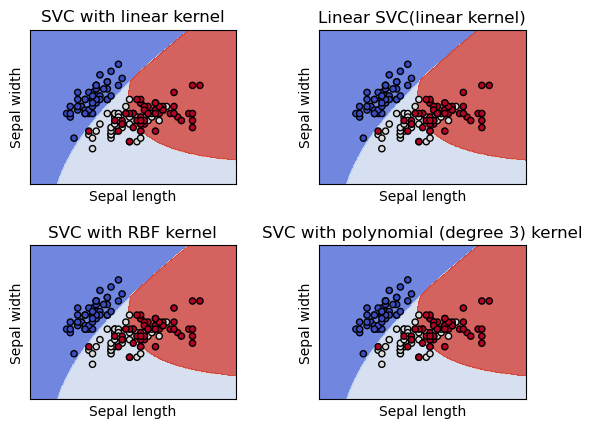

In [16]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### 당뇨 데이터

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabdata = pd.read_csv("./data/diabetes.csv")
diabdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

y = diabdata['Outcome']
X = diabdata.drop('Outcome', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from sklearn.svm import SVC

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [20]:
y_pred = svc_classifier.predict(x_test)

print("accuracy: ", sklearn.metrics.accuracy_score(y_test, y_pred))
print("confusion_matrix: \n", sklearn.metrics.confusion_matrix(y_test, y_pred))
print("classification_report: \n", sklearn.metrics.classification_report(y_test, y_pred))

accuracy:  0.7792207792207793
confusion_matrix: 
 [[134  13]
 [ 38  46]]
classification_report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       147
           1       0.78      0.55      0.64        84

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



### 피어슨 상관계수를 통한 분석

<Axes: title={'center': 'Pearson Correlation of attributes'}>

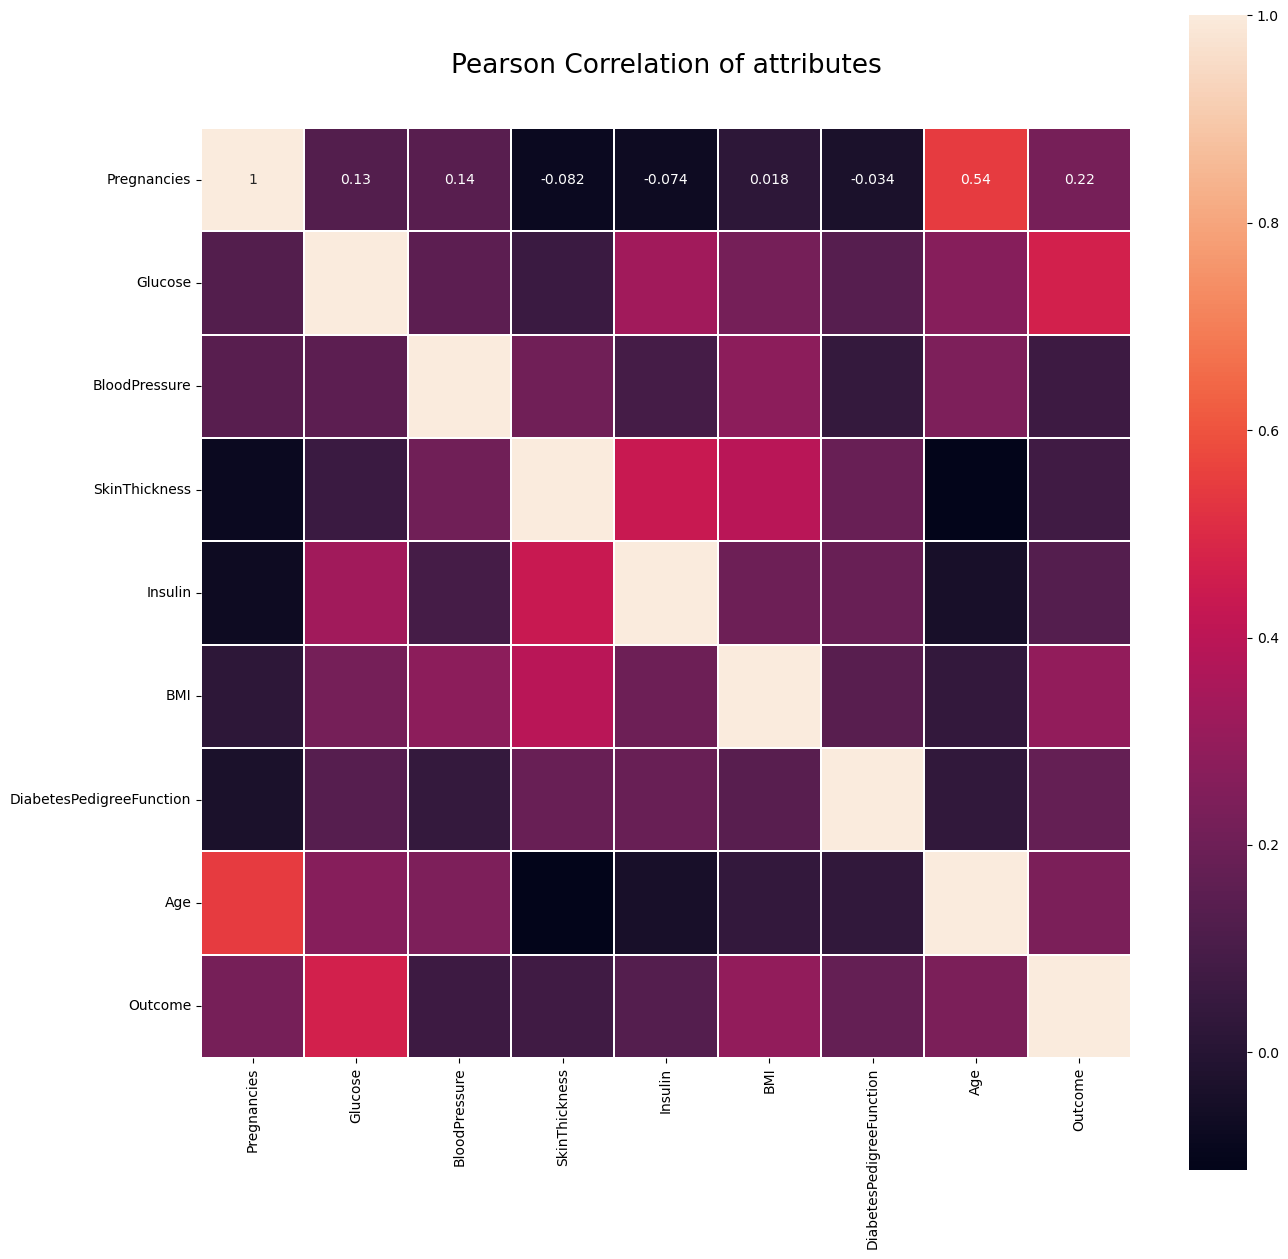

In [22]:
colormap = plt.cm.viridis

plt.figure(figsize=(15, 15))
plt.title("Pearson Correlation of attributes", y=1.05, size=19)
sns.heatmap(diabdata.corr(), linewidths=0.1, vmax=1, square=True, annot=True)

### 산점도 행렬

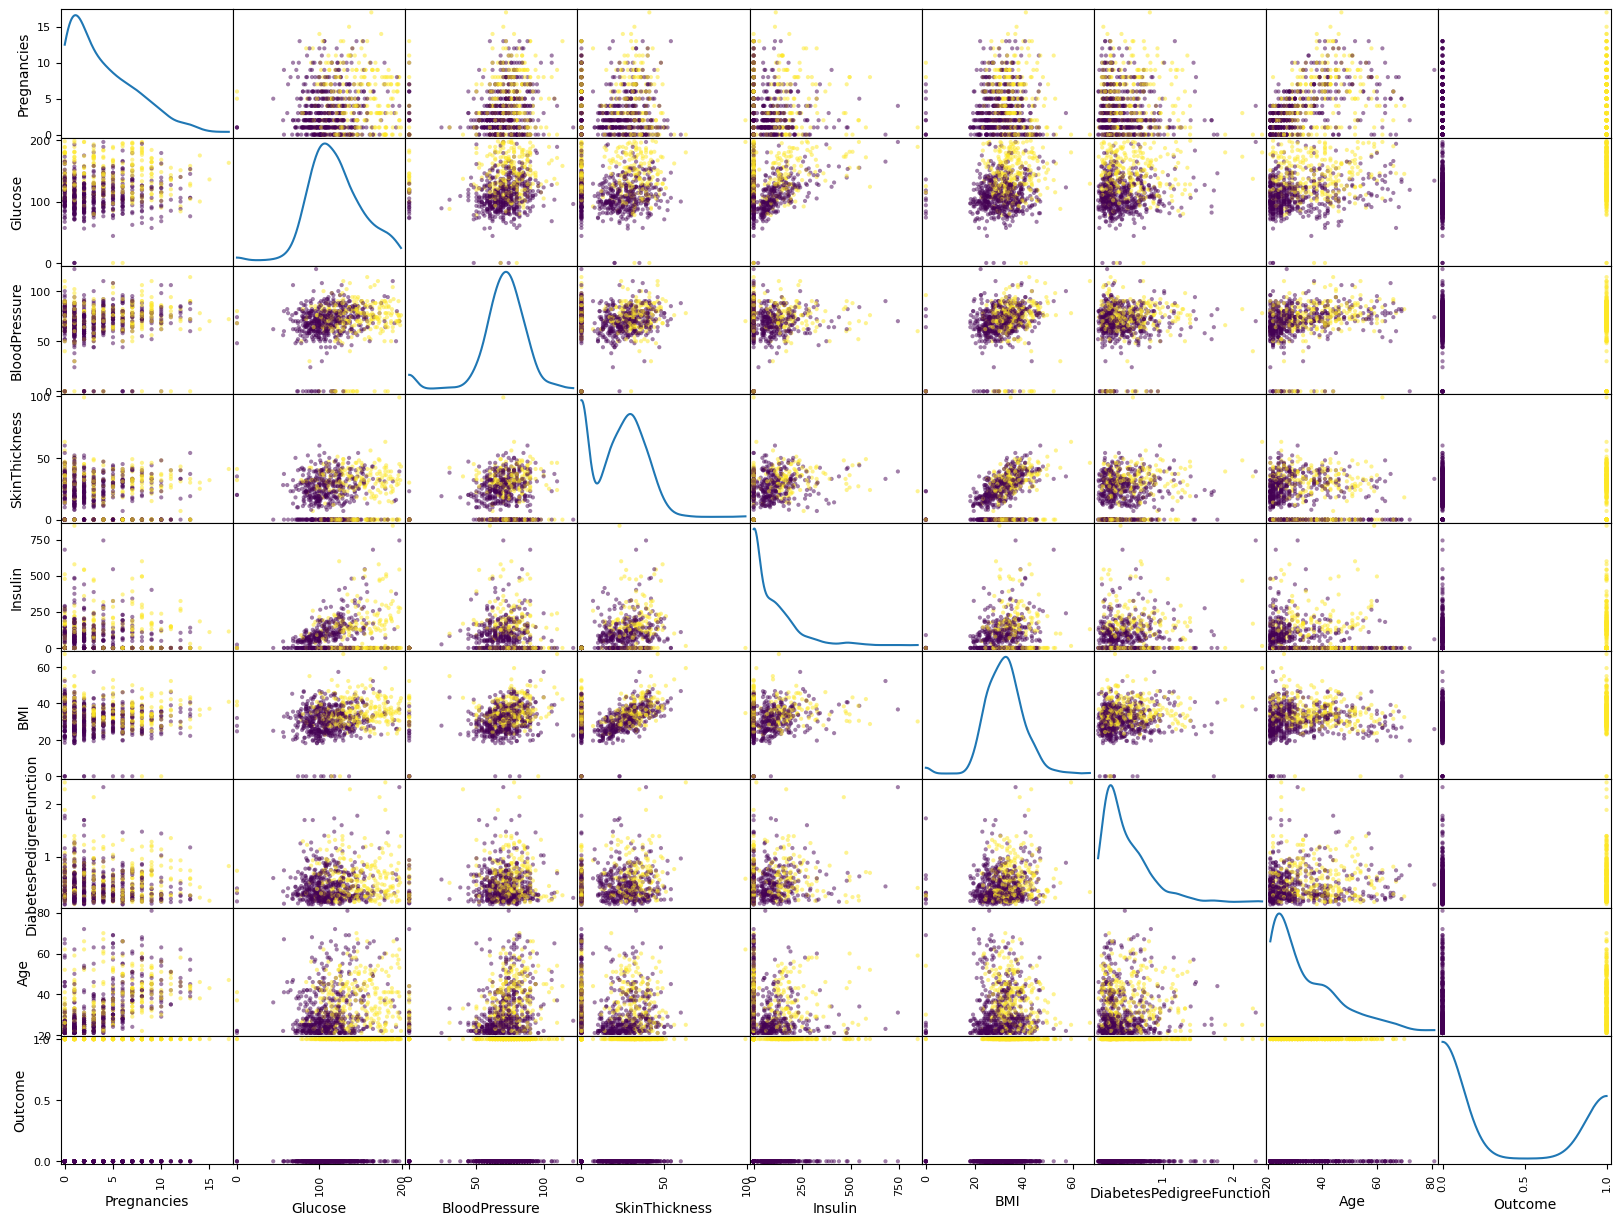

In [23]:
spd= pd.plotting.scatter_matrix(diabdata,c=diabdata['Outcome'], figsize=(20,15), diagonal="kde")

### 과사람 데이터를 활용한 SVM 분류기

In [38]:
import pandas as pd
df = pd.read_excel('./data/wpdb.xlsx')
df.head(5)

,UID,CenterId,StudentName,SchoolName,SchoolGrade,SchoolLevel,StudentGrade,Address,Address2,StudentStatus,cs_count,max_sche_date,withdraw_csl_count,remain_csl_count,supply_count,clinic_count,abs_count,pre_count,target
0,00249736-53A0-4D68-8CB9-DFA306A33435,15,임현승,성동중학교,1학년,high,17,NaN,NaN,drop,5,2023-11-17,0,3,0,0,1,41,0
1,00515C99-00A6-444B-93A3-73D7BB0852E5,15,노해율,내성중학교,3학년,middle,16,부산 동래구 금정마을로 135-9(동래 래미안 아이파크),2단지-5호차,present,5,2023-07-20,0,19,0,0,0,52,0
2,00600FC7-C7DE-40DE-AD7D-A1D94DD5D212,16,신아인,경일중학교,3학년,middle,16,부산 강서구 명지국제7로 110(더 힐 시그니처),NaN,present,8,2024-02-15,0,0,0,0,0,0,1
3,0063DEBD-095C-4804-A246-7EDD5160419A,14,손태윤,브니엘예술중학교,3학년,middle,16,NaN,NaN,drop,2,2023-10-01,0,0,0,0,0,6,0
4,007378EC-9A44-4A75-8B1A-70D13FBE7832,16,오주안,오션중학교,3학년,middle,16,NaN,명지 오션 11로 87,present,29,2024-02-15,0,23,0,0,1,278,1


In [45]:
X=df[df.columns[6:]]
X = X.drop(columns = ['Address','Address2', 'max_sche_date', 'StudentStatus', 'abs_count', 'supply_count', 'clinic_count'])
X['StudentGrade'].replace({15: 0, 16: 1, 17:2}, inplace=True)

# X = X[:, 5]
X = X.drop(['target'], axis=1)
y = df['target']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = sklearn.svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [51]:
y_pred = model.predict(x_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

accuracy: 0.696
